<a href="https://colab.research.google.com/github/frehiwot-g-girmay/MHchatbot/blob/main/MHChatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Now you can access files in your Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [ ]:
# Download Dependencies

%pip install -r '../content/drive/My Drive/requirements.txt'

import nltk

nltk.download('stopwords')
nltk.download('wordnet')

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached contourpy-1.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached fonttools-4.47.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (157 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_auth-2.27.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached grpcio-1.60.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Install dependencies

%pip install -r '../content/drive/My Drive/requirements.txt'

import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Set paths

path_to_csv = '../content/drive/My Drive/Dataset/mentalhealth.csv'

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached contourpy-1.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached fonttools-4.47.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (157 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_auth-2.27.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached grpcio-1.60.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using

In [ ]:
import re
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import string
import re
import joblib
import json
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, LSTM, Input, Embedding, TimeDistributed, Flatten, Dropout,Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# Install dependencies

%pip install -r '../content/drive/My Drive/requirements.txt'

import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Set paths

path_to_csv = '../content/drive/My Drive/mentalhealth.csv'

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached contourpy-1.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached fonttools-4.47.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (157 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_auth-2.27.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached grpcio-1.60.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using

In [ ]:
data=pd.read_csv(path_to_csv, nrows=20)

In [ ]:
data.head()

,Question_ID,Questions,Answers
0,1590140,ሕማም ኣእምሮ ምህላው እንታይ ማለት እዩ?,ሕማማት ኣእምሮ፡ ንሓሳብ ሰብ፡ ስምዒታቱ፡ ዝምድናኡን መዓልታዊ ኣሰራርሓኡ...
1,2110618,ሕማም ኣእምሮ ንመን ይጸልዎ?,ሕማም ኣእምሮ ንዝኾነ ሰብ ክጸልዎ ይኽእል እዩ፣ ጾታ፣ ዕድመ፣ ኣታዊ፣ ማ...
2,9434130,ገለ ካብቶም ናይ መጠንቀቕታ ምልክታት ሕማም ኣእምሮ እንታይ እዮም?,ምልክታት ጸገማት ጥዕና ኣእምሮ ከከም ዓይነትን ጽንኩርነትን ናይቲ ኩነታት...
3,7657263,ሕማም ኣእምሮ ዘለዎም ሰባት ክሓውዩ ይኽእሉ ድዮም?,ካብ ሕማም ኣእምሮ ክትሓዊ ከለኻ፡ ብኣግኡ ምልላይን ሕክምናን ኣዝዩ ኣገዳ...
4,1619387,ምልክታት ናይ ኣእምሮ ጸገም ዘለዎ ዝመስል ሰብ እንተፈሊጠ እንታይ ክገብር...,እዚ ምልክታት ዘለዎ ሰብ እንተፈሊጥካ/ኪ ምስ ኣዕሩኽቱን/ኣዕሩኽታን/ ኣባ...


In [ ]:
import re

for i in range(data.shape[0]):
    answer = data['Answers'][i]
    # Convert to string if not already
    if not isinstance(answer, str):
        answer = str(answer)
    # Perform substitutions
    answer = re.sub(r'\n', ' ', answer)
    answer = re.sub(r'\(', '', answer)
    answer = re.sub(r'\)', '', answer)
    answer = re.sub(r',', '', answer)
    answer = re.sub(r'-', '', answer)
    answer = re.sub(r'/', '', answer)
    answer = re.sub(r'/', '', answer)
    # Save back to DataFrame
    data.at[i, 'Answers'] = answer

In [ ]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answers'][i]))

In [ ]:
pairs

[('ሕማም ኣእምሮ ምህላው እንታይ ማለት እዩ?',
  'ሕማማት ኣእምሮ፡ ንሓሳብ ሰብ፡ ስምዒታቱ፡ ዝምድናኡን መዓልታዊ ኣሰራርሓኡን ዝዘርጉ ኩነታት ጥዕና እዮም።'),
 ('ሕማም ኣእምሮ ንመን ይጸልዎ?',
  'ሕማም ኣእምሮ ንዝኾነ ሰብ ክጸልዎ ይኽእል እዩ፣ ጾታ፣ ዕድመ፣ ኣታዊ፣ ማሕበራዊ ደረጃ፣ ብሄር፣ ሃይማኖት፣ ጾታዊ ዝንባለ ወይ ድሕረ ባይታ ብዘየገድስ።'),
 ('ገለ ካብቶም ናይ መጠንቀቕታ ምልክታት ሕማም ኣእምሮ እንታይ እዮም?',
  'ምልክታት ጸገማት ጥዕና ኣእምሮ ከከም ዓይነትን ጽንኩርነትን ናይቲ ኩነታት ይፈላለ እዩ።'),
 ('ሕማም ኣእምሮ ዘለዎም ሰባት ክሓውዩ ይኽእሉ ድዮም?',
  'ካብ ሕማም ኣእምሮ ክትሓዊ ከለኻ፡ ብኣግኡ ምልላይን ሕክምናን ኣዝዩ ኣገዳሲ እዩ።'),
 ('ምልክታት ናይ ኣእምሮ ጸገም ዘለዎ ዝመስል ሰብ እንተፈሊጠ እንታይ ክገብር ኣለኒ?',
  'እዚ ምልክታት ዘለዎ ሰብ እንተፈሊጥካኪ ምስ ኣዕሩኽቱንኣዕሩኽታን ኣባላት ስድርኡን ስድርኣን ንኽዛረብንኽትዛረብ ምኽሪ ካብ በዓል ሞያ ጥዕና ኣእምሮ ክሓትትንክትሓትትን ተባብዕተተባብዕ። '),
 ('ከመይ ጌረ ንነብሰይ ወይ ንውላደይ ዝኸውን በዓል ሞያ ጥዕና ኣእምሮ ክረክብ ይኽእል?',
  'ምስቲ ንስኻ ወይ ውላድካ ምስኡ እትሰርሕሉ በዓል ሞያ ምቹእ ስምዒት ምህላው ንዕውትነት እቲ ሕክምና ወሳኒ እዩ።'),
 ('እንታይ ዓይነት ኣማራጺታት ሕክምና ኣሎ?',
  'ንሕማም ኣእምሮ ዘለዎም ውልቀሰባት ዝተፈላለዩ ኣማራጺታት ሕክምና ኣለዉ።'),
 ('ኣብ ሕክምና እንተተጸሚደ እንታይ ክፈልጥ ኣለኒ?',
  'ብዝተኻእለ መጠን ኣብ መስርሕ ሕክምና ክትሳተፍን ክትዋፈርን ኣገዳሲ እዩ።'),
 ('ኣብ መንጎ ሰብ ሞያ ጥዕና ኣእምሮ እንታይ ፍልልይ ኣለዎ?',
  'ብዙሓት ዓይነታት ሰብ ሞያ ጥዕና ኣእምሮ ኣለዉ።

In [ ]:
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Splitting words from punctuation
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens))  # contains all words of input_docs
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [ ]:
input_docs

['ሕማም ኣእምሮ ምህላው እንታይ ማለት እዩ?',
 'ሕማም ኣእምሮ ንመን ይጸልዎ?',
 'ገለ ካብቶም ናይ መጠንቀቕታ ምልክታት ሕማም ኣእምሮ እንታይ እዮም?',
 'ሕማም ኣእምሮ ዘለዎም ሰባት ክሓውዩ ይኽእሉ ድዮም?',
 'ምልክታት ናይ ኣእምሮ ጸገም ዘለዎ ዝመስል ሰብ እንተፈሊጠ እንታይ ክገብር ኣለኒ?',
 'ከመይ ጌረ ንነብሰይ ወይ ንውላደይ ዝኸውን በዓል ሞያ ጥዕና ኣእምሮ ክረክብ ይኽእል?',
 'እንታይ ዓይነት ኣማራጺታት ሕክምና ኣሎ?',
 'ኣብ ሕክምና እንተተጸሚደ እንታይ ክፈልጥ ኣለኒ?',
 'ኣብ መንጎ ሰብ ሞያ ጥዕና ኣእምሮ እንታይ ፍልልይ ኣለዎ?',
 'ከመይ ጌረ ንውላደይ ወይ ንባዕለይ ዝምጥን በዓል ሞያ ጥዕና ኣእምሮ ክረክብ ይኽእል?',
 'ኣብ ሕክምና እንተተሳቲፈ እንታይ ክፈልጥ ኣለኒ?',
 'ካልእ ካበይ ሓገዝ ክረክብ ይኽእል?',
 'ሓድሽ መድሃኒት ቅድሚ ምጅማረይ እንታይ ክፈልጥ ኣለኒ?',
 'ድሕሪ መድሃኒት ምውሳድ ዝሓሸ ስምዒት እንተተሰሚዑኒ "ሓዊየ" ምውሳድ ከቋርጽ ይኽእል ማለት ድዩ?',
 'መድሃኒተይ ንምኽፋል ሓገዝ ብኸመይ ክረክብ ይኽእል?፣ ኣብ ኢትዮጵያ ብዝተፈላለዩ መንገድታት፣ እንተላይ ብኢንስቲትዩት ህዝባዊ ጥዕና ኢትዮጵያ፣ መደባት መድሕን ጥዕና፣ ከምኡ’ውን ከም ማሕበር ቀይሕ መስቀል ኢትዮጵያ ዝኣመሰሉ ዘይመንግስታውያን ትካላት ሓገዝ ክትደልዩ ትኽእሉ ኢኹም። ከምኡ’ውን ንተቓላዕቲ ህዝቢ ዝኸውን መደባት ክትድህስስ ትኽእል ኢኻ፣ ከም ነቶም ነጻ ወይ ትሑት ዋጋ ዘለዎም መድሃኒታት ዘድልዮም። ነዞም መርበብ ሓበሬታታት https://www.rxassist.org/ ከምኡ’ውን https://mariestopes.org.et/ ክትበጽሑ ትኽእሉ ኢኹም።',
 'ኣበይ ክኸይድ ይኽእል ፍወሳ ክረክብ፣ሓያሎ ዝተፈላለዩ ዓይነታት ሕክምናን ፍወሳን ክሕግዙ ዝኽ

In [ ]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [ ]:
input_features_dict

{'"': 0,
 '-': 1,
 '.': 2,
 '/': 3,
 ':': 4,
 '?': 5,
 'et': 6,
 'https': 7,
 'mariestopes': 8,
 'org': 9,
 'rxassist': 10,
 'www': 11,
 'ህዝቢ': 12,
 'ህዝባዊ': 13,
 'ሓበሬታታት': 14,
 'ሓካይም': 15,
 'ሓዊየ': 16,
 'ሓያሎ': 17,
 'ሓድሽ': 18,
 'ሓገዝ': 19,
 'ሕሙማት': 20,
 'ሕማም': 21,
 'ሕክምና': 22,
 'ሕክምናን': 23,
 'መርበብ': 24,
 'መስቀል': 25,
 'መንገድታት': 26,
 'መንጎ': 27,
 'መደባት': 28,
 'መድሃኒተይ': 29,
 'መድሃኒታት': 30,
 'መድሃኒት': 31,
 'መድሕን': 32,
 'መጠንቀቕታ': 33,
 'መጽናዕቲ': 34,
 'ማለት': 35,
 'ማሕበራዊ': 36,
 'ማሕበር': 37,
 'ምህላው': 38,
 'ምልክታት': 39,
 'ምሕደራ': 40,
 'ምርካብ': 41,
 'ምትእትታው': 42,
 'ምውሳድ': 43,
 'ምጅማረይ': 44,
 'ሞያ': 45,
 'ሞያውያንን': 46,
 'ሰራሕተኛታትን': 47,
 'ሰባት': 48,
 'ሰብ': 49,
 'ስልጠናን': 50,
 'ስምዒት': 51,
 'ስነ': 52,
 'ቀይሕ': 53,
 'ቅልውላው': 54,
 'ቅድሚ': 55,
 'በዓል': 56,
 'ብኢንስቲትዩት': 57,
 'ብኸመይ': 58,
 'ብዛዕባ': 59,
 'ብዝተፈላለዩ': 60,
 'ተራን': 61,
 'ትሑት': 62,
 'ትካላት': 63,
 'ትኽእሉ': 64,
 'ትኽእል': 65,
 'ነርስ': 66,
 'ነቶም': 67,
 'ነዞም': 68,
 'ነጻ': 69,
 'ነፍሲ': 70,
 'ናይ': 71,
 'ንመን': 72,
 'ንምኽፋል': 73,
 'ንባዕለይ': 74,
 'ንተቓላዕቲ': 75,
 'ንነብሰይ': 76,
 'ንኣብነት': 

In [ ]:
import re
import numpy as np

# Assuming input_docs and target_docs are your datasets
# and input_features_dict & target_features_dict are your token-to-index mappings

# Build dictionaries (if not already built)
# For example, extracting unique tokens from your data:
all_input_tokens = set()
all_target_tokens = set()

for input_doc in input_docs:
    all_input_tokens.update(re.findall(r"[\w']+|[^\s\w]", input_doc))
for target_doc in target_docs:
    all_target_tokens.update(re.findall(r"[\w']+|[^\s\w]", target_doc))

input_features_dict = {token: idx for idx, token in enumerate(sorted(all_input_tokens))}
target_features_dict = {token: idx for idx, token in enumerate(sorted(all_target_tokens))}

# Define number of tokens
num_encoder_tokens = len(input_features_dict)
num_decoder_tokens = len(target_features_dict)

# Now your existing code can use these variables
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        if token in input_features_dict:
            encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    for timestep, token in enumerate(target_doc.split()):
        if token in target_features_dict:
            decoder_input_data[line, timestep, target_features_dict[token]] = 1.
            if timestep > 0:
                decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [ ]:
input_docs

['ሕማም ኣእምሮ ምህላው እንታይ ማለት እዩ?',
 'ሕማም ኣእምሮ ንመን ይጸልዎ?',
 'ገለ ካብቶም ናይ መጠንቀቕታ ምልክታት ሕማም ኣእምሮ እንታይ እዮም?',
 'ሕማም ኣእምሮ ዘለዎም ሰባት ክሓውዩ ይኽእሉ ድዮም?',
 'ምልክታት ናይ ኣእምሮ ጸገም ዘለዎ ዝመስል ሰብ እንተፈሊጠ እንታይ ክገብር ኣለኒ?',
 'ከመይ ጌረ ንነብሰይ ወይ ንውላደይ ዝኸውን በዓል ሞያ ጥዕና ኣእምሮ ክረክብ ይኽእል?',
 'እንታይ ዓይነት ኣማራጺታት ሕክምና ኣሎ?',
 'ኣብ ሕክምና እንተተጸሚደ እንታይ ክፈልጥ ኣለኒ?',
 'ኣብ መንጎ ሰብ ሞያ ጥዕና ኣእምሮ እንታይ ፍልልይ ኣለዎ?',
 'ከመይ ጌረ ንውላደይ ወይ ንባዕለይ ዝምጥን በዓል ሞያ ጥዕና ኣእምሮ ክረክብ ይኽእል?',
 'ኣብ ሕክምና እንተተሳቲፈ እንታይ ክፈልጥ ኣለኒ?',
 'ካልእ ካበይ ሓገዝ ክረክብ ይኽእል?',
 'ሓድሽ መድሃኒት ቅድሚ ምጅማረይ እንታይ ክፈልጥ ኣለኒ?',
 'ድሕሪ መድሃኒት ምውሳድ ዝሓሸ ስምዒት እንተተሰሚዑኒ "ሓዊየ" ምውሳድ ከቋርጽ ይኽእል ማለት ድዩ?',
 'መድሃኒተይ ንምኽፋል ሓገዝ ብኸመይ ክረክብ ይኽእል?፣ ኣብ ኢትዮጵያ ብዝተፈላለዩ መንገድታት፣ እንተላይ ብኢንስቲትዩት ህዝባዊ ጥዕና ኢትዮጵያ፣ መደባት መድሕን ጥዕና፣ ከምኡ’ውን ከም ማሕበር ቀይሕ መስቀል ኢትዮጵያ ዝኣመሰሉ ዘይመንግስታውያን ትካላት ሓገዝ ክትደልዩ ትኽእሉ ኢኹም። ከምኡ’ውን ንተቓላዕቲ ህዝቢ ዝኸውን መደባት ክትድህስስ ትኽእል ኢኻ፣ ከም ነቶም ነጻ ወይ ትሑት ዋጋ ዘለዎም መድሃኒታት ዘድልዮም። ነዞም መርበብ ሓበሬታታት https://www.rxassist.org/ ከምኡ’ውን https://mariestopes.org.et/ ክትበጽሑ ትኽእሉ ኢኹም።',
 'ኣበይ ክኸይድ ይኽእል ፍወሳ ክረክብ፣ሓያሎ ዝተፈላለዩ ዓይነታት ሕክምናን ፍወሳን ክሕግዙ ዝኽ

In [ ]:
target_docs

['<START> ሕማማት ኣእምሮ ፡ ንሓሳብ ሰብ ፡ ስምዒታቱ ፡ ዝምድናኡን መዓልታዊ ኣሰራርሓኡን ዝዘርጉ ኩነታት ጥዕና እዮም ። <END>',
 '<START> ሕማም ኣእምሮ ንዝኾነ ሰብ ክጸልዎ ይኽእል እዩ ፣ ጾታ ፣ ዕድመ ፣ ኣታዊ ፣ ማሕበራዊ ደረጃ ፣ ብሄር ፣ ሃይማኖት ፣ ጾታዊ ዝንባለ ወይ ድሕረ ባይታ ብዘየገድስ ። <END>',
 '<START> ምልክታት ጸገማት ጥዕና ኣእምሮ ከከም ዓይነትን ጽንኩርነትን ናይቲ ኩነታት ይፈላለ እዩ ። <END>',
 '<START> ካብ ሕማም ኣእምሮ ክትሓዊ ከለኻ ፡ ብኣግኡ ምልላይን ሕክምናን ኣዝዩ ኣገዳሲ እዩ ። <END>',
 '<START> እዚ ምልክታት ዘለዎ ሰብ እንተፈሊጥካኪ ምስ ኣዕሩኽቱንኣዕሩኽታን ኣባላት ስድርኡን ስድርኣን ንኽዛረብንኽትዛረብ ምኽሪ ካብ በዓል ሞያ ጥዕና ኣእምሮ ክሓትትንክትሓትትን ተባብዕተተባብዕ ። <END>',
 '<START> ምስቲ ንስኻ ወይ ውላድካ ምስኡ እትሰርሕሉ በዓል ሞያ ምቹእ ስምዒት ምህላው ንዕውትነት እቲ ሕክምና ወሳኒ እዩ ። <END>',
 '<START> ንሕማም ኣእምሮ ዘለዎም ውልቀሰባት ዝተፈላለዩ ኣማራጺታት ሕክምና ኣለዉ ። <END>',
 '<START> ብዝተኻእለ መጠን ኣብ መስርሕ ሕክምና ክትሳተፍን ክትዋፈርን ኣገዳሲ እዩ ። <END>',
 '<START> ብዙሓት ዓይነታት ሰብ ሞያ ጥዕና ኣእምሮ ኣለዉ ። ዝተፈላለዩ ወሃብቲ ኣገልግሎትን ኣገልግሎታቶምን ምድንጋር ክህልዎም ይኽእል እዩ ። ነፍሲ ወከፎም ዝተፈላለየ ደረጃ ትምህርቲ ፣ ስልጠና ፣ ዝተፈላለየ ዓውዲ ክእለት ክህልዎም ይኽእል እዩ ። ንጠለባትካ ብዝበለፀ ዝሰማማዕ በዓል ሞያ ምርካብ ገለ መፅናዕቲ ክሓትት ይኽእል እዩ ። . <END>',
 '<START> ምስ እቲ ንስኻ ወይ ውላድካ ትሰርሓሉ ዘለኻ በዓል ሞያ ምቹእ ስምዒት ምህላው ን

In [ ]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [ ]:
input_features_dict

{'"': 0,
 '-': 1,
 '.': 2,
 '/': 3,
 ':': 4,
 '?': 5,
 'et': 6,
 'https': 7,
 'mariestopes': 8,
 'org': 9,
 'rxassist': 10,
 'www': 11,
 'ህዝቢ': 12,
 'ህዝባዊ': 13,
 'ሓበሬታታት': 14,
 'ሓካይም': 15,
 'ሓዊየ': 16,
 'ሓያሎ': 17,
 'ሓድሽ': 18,
 'ሓገዝ': 19,
 'ሕሙማት': 20,
 'ሕማም': 21,
 'ሕክምና': 22,
 'ሕክምናን': 23,
 'መርበብ': 24,
 'መስቀል': 25,
 'መንገድታት': 26,
 'መንጎ': 27,
 'መደባት': 28,
 'መድሃኒተይ': 29,
 'መድሃኒታት': 30,
 'መድሃኒት': 31,
 'መድሕን': 32,
 'መጠንቀቕታ': 33,
 'መጽናዕቲ': 34,
 'ማለት': 35,
 'ማሕበራዊ': 36,
 'ማሕበር': 37,
 'ምህላው': 38,
 'ምልክታት': 39,
 'ምሕደራ': 40,
 'ምርካብ': 41,
 'ምትእትታው': 42,
 'ምውሳድ': 43,
 'ምጅማረይ': 44,
 'ሞያ': 45,
 'ሞያውያንን': 46,
 'ሰራሕተኛታትን': 47,
 'ሰባት': 48,
 'ሰብ': 49,
 'ስልጠናን': 50,
 'ስምዒት': 51,
 'ስነ': 52,
 'ቀይሕ': 53,
 'ቅልውላው': 54,
 'ቅድሚ': 55,
 'በዓል': 56,
 'ብኢንስቲትዩት': 57,
 'ብኸመይ': 58,
 'ብዛዕባ': 59,
 'ብዝተፈላለዩ': 60,
 'ተራን': 61,
 'ትሑት': 62,
 'ትካላት': 63,
 'ትኽእሉ': 64,
 'ትኽእል': 65,
 'ነርስ': 66,
 'ነቶም': 67,
 'ነዞም': 68,
 'ነጻ': 69,
 'ነፍሲ': 70,
 'ናይ': 71,
 'ንመን': 72,
 'ንምኽፋል': 73,
 'ንባዕለይ': 74,
 'ንተቓላዕቲ': 75,
 'ንነብሰይ': 76,
 'ንኣብነት': 

In [ ]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model
dimensionality = 256 # Dimensionality
batch_size = 10   # The batch size and number of epochs
epochs = 500

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) # Compiling

In [ ]:
training_model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, None, 164) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, None, 166) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 256),     │    431,104 │ input_layer_24[0… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    433,152 │ input_layer_25[0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None, 166) │     42,662 │ lstm_3[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 906,918 (3.46 MB)

 Trainable params: 906,918 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

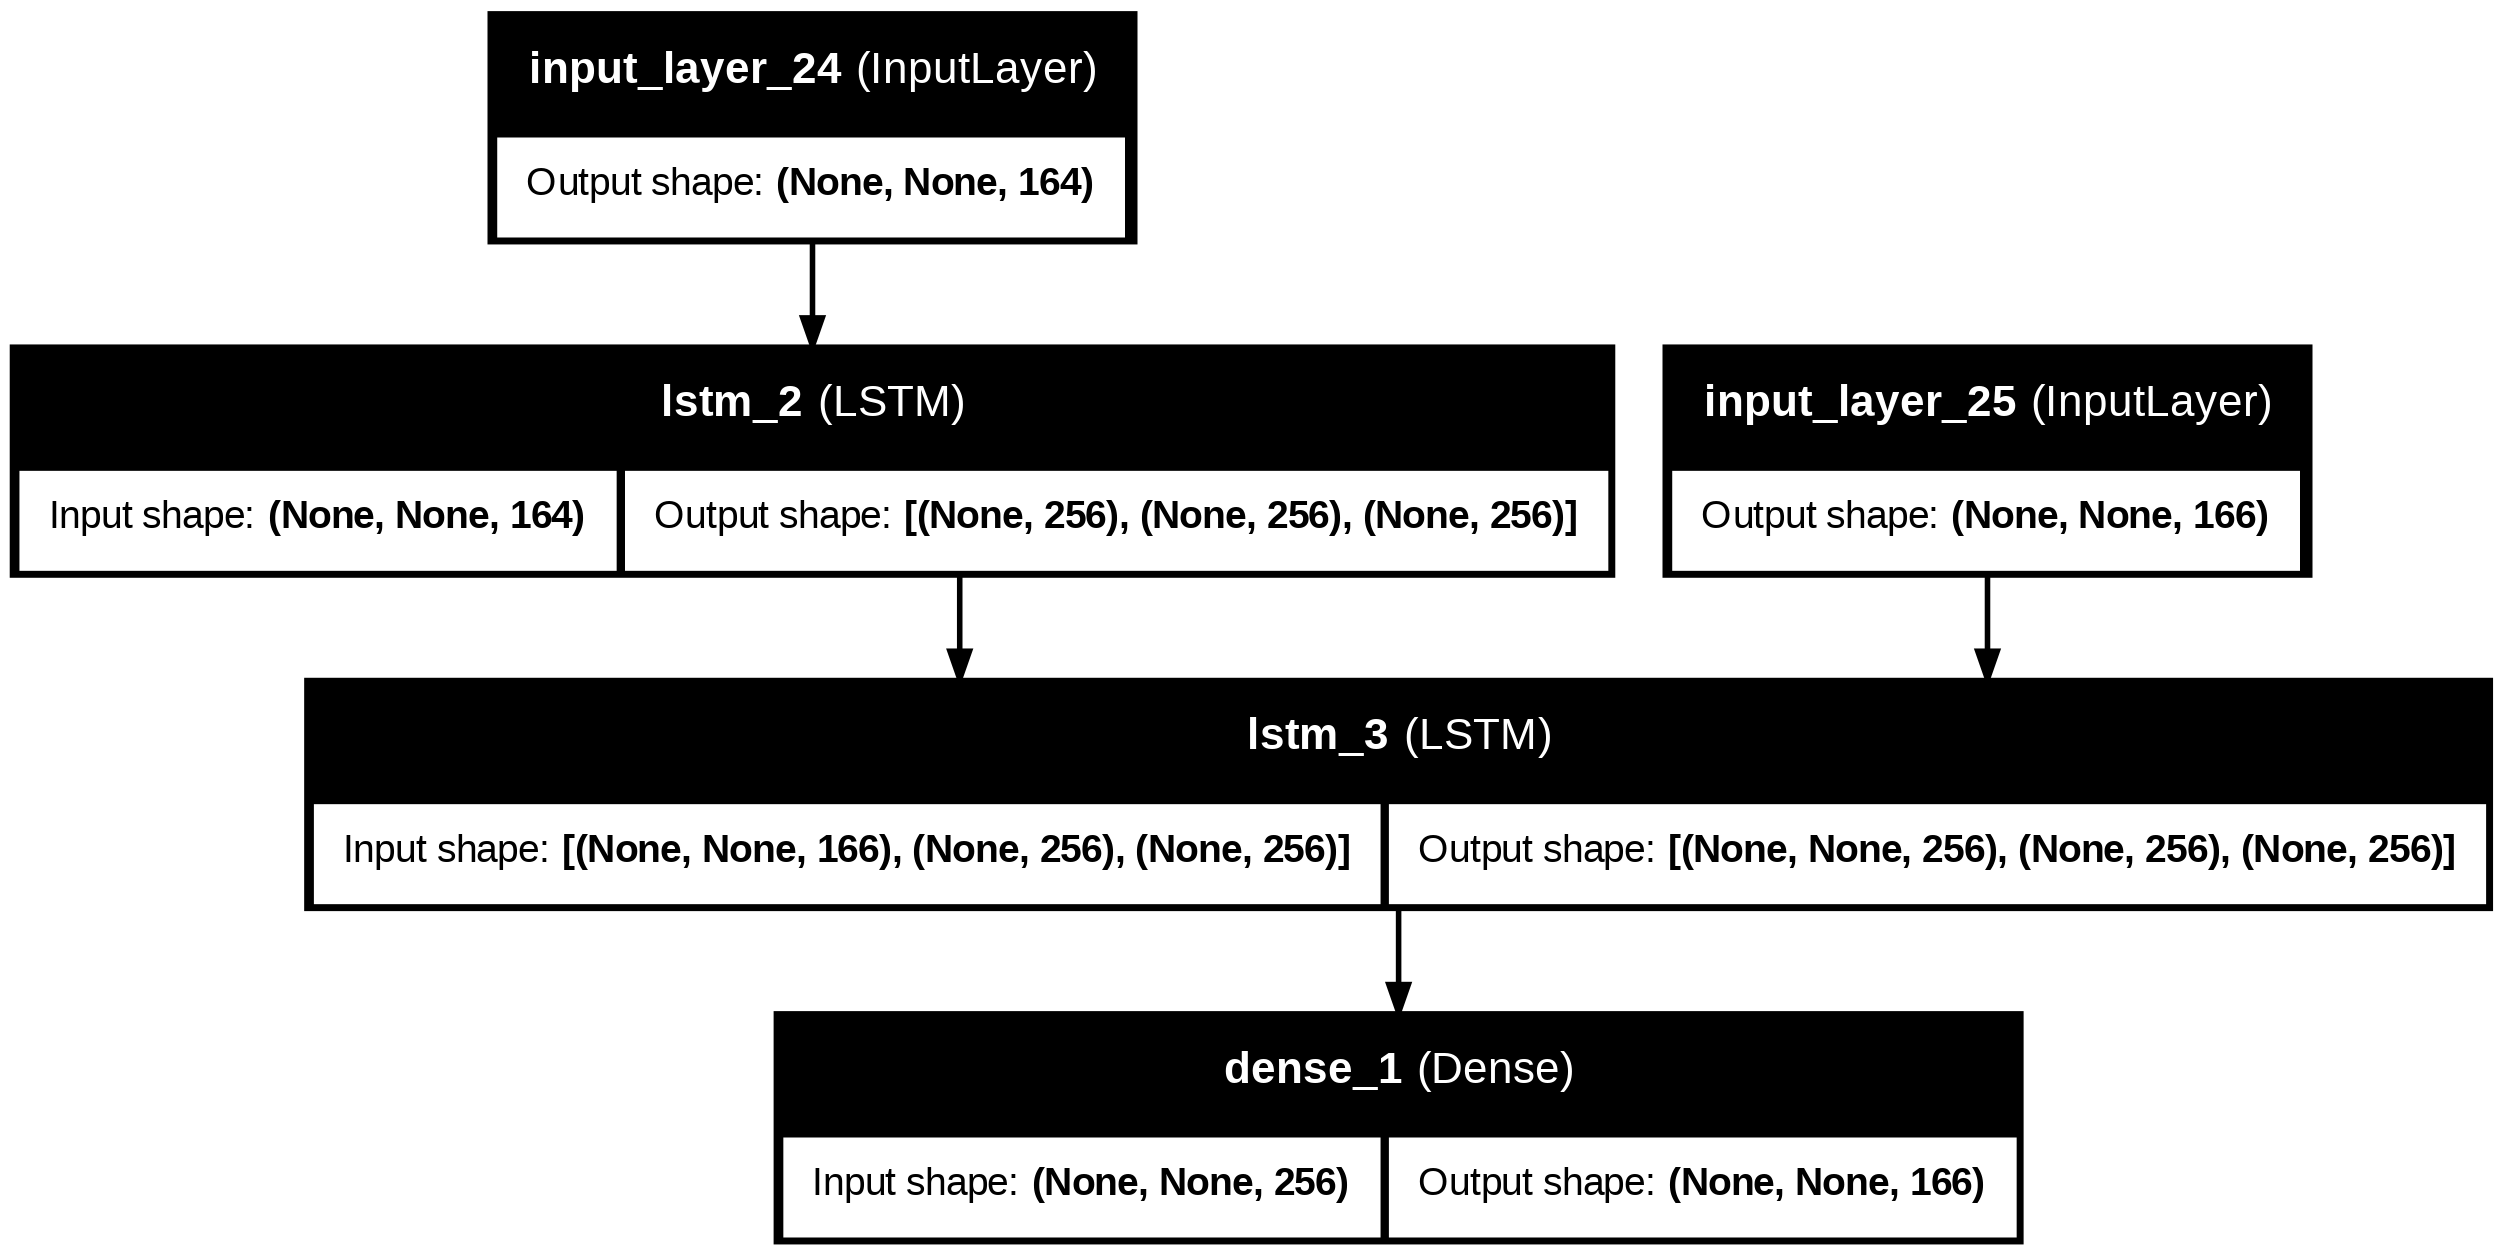

In [ ]:
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

In [ ]:
training_model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Training
history1 = training_model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)
training_model.save('training_model.h5')

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0186 - loss: 1.2977 - val_accuracy: 0.0196 - val_loss: 1.4571
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - accuracy: 0.0234 - loss: 1.4043 - val_accuracy: 0.0196 - val_loss: 1.4472
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.0163 - loss: 1.2859 - val_accuracy: 0.0147 - val_loss: 1.4521
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step - accuracy: 0.0286 - loss: 1.3390 - val_accuracy: 0.0000e+00 - val_loss: 1.4525
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.0131 - loss: 1.3674 - val_accuracy: 0.0049 - val_loss: 1.4507
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.0132 - loss: 1.4327 - val_accuracy: 0.0196 - val_loss: 1.4495
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.0216 - loss: 1.3502 - val_accuracy: 0.0196 - val_loss: 1.4523
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 0.0265 - loss: 1.3264 - val_accuracy: 0.0147 - 

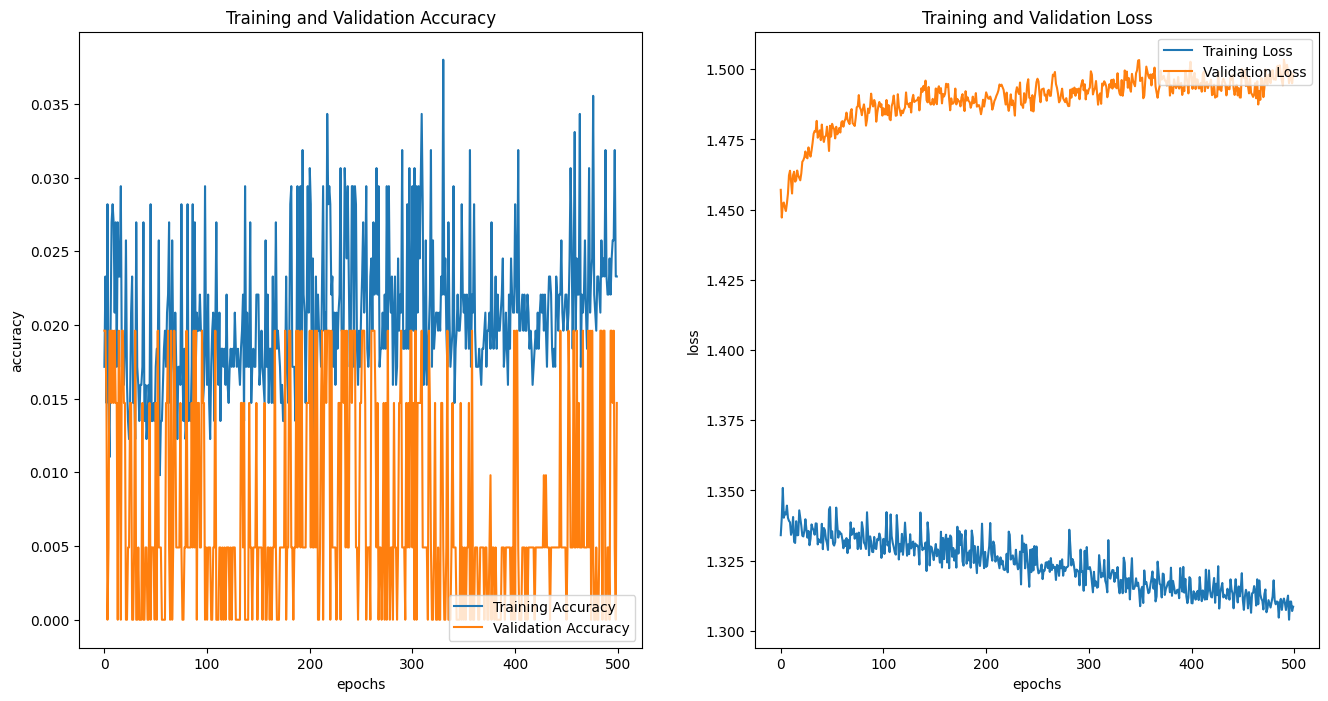

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [ ]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [ ]:
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)

    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.

    #A variable to store our response word by word
    decoded_sentence = ''

    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)

          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token_index = int(sampled_token_index)
          sampled_token = reverse_target_features_dict.get(sampled_token_index, "<<ሕማም ኣእምሮ ምህላው እንታይ ማለት እዩ?")
          decoded_sentence += " " + sampled_token
          #Stop if hit max length or found the stop token
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.

          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

In [ ]:
import re
import numpy as np
class ChatBot:
    negative_responses = ("ኣይፋልን", "ኣይፋልን", "ናህ","ናው", "ዕድል ኣይኮነን", "ይቕሬታ")
    exit_commands = ("ኣቋርጽ", "ዓረፍ", "ምውጻእ", "ሰሰናዩ", "ሰሰና", "ደሓር", "ደው")

    def __init__(self):
        self.max_encoder_seq_length = 100  # Set your maximum sequence length here

    # Method to start the conversation
    def start_chat(self):
        user_response = input("ሰላም! ኣነ ኣብ ጥዕና ኣእምሮ ደቂ ሰባት ዝሰልጠንኩ ቻትቦት እየ። ሕጂ እንታይ ክሕግዘካ ይኽእል?\n")
        if user_response in self.negative_responses:
            print("እሺ! ሰናይ መዓልቲ ይግበረልኩም!")
            return
        self.chat(user_response)

    # Method to handle the conversation
    def chat(self, reply):
        while not self.make_exit(reply):
            reply = input(self.generate_response(reply) + "\n")

    # Method to convert user input into a matrix
    def string_to_matrix(self, user_input):
        tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
        user_input_matrix = np.zeros(
            (1, self.max_encoder_seq_length, num_encoder_tokens),
            dtype='float32')
        for timestep, token in enumerate(tokens):
            if timestep >= self.max_encoder_seq_length:
                break  # Prevent index error if tokens exceed max length
            if token in input_features_dict:
                user_input_matrix[0, timestep, input_features_dict[token]] = 1.
        return user_input_matrix

    # Method that will create a response using seq2seq model we built
    def generate_response(self, user_input):
        input_matrix = self.string_to_matrix(user_input)
        chatbot_response = decode_response(input_matrix)
        # Remove <START> and <END> tokens from chatbot_response
        chatbot_response = chatbot_response.replace("<START>",'')
        chatbot_response = chatbot_response.replace("<END>",'')
        return chatbot_response

    # Method to check for exit commands
    def make_exit(self, reply):
        for exit_command in self.exit_commands:
            if exit_command in reply:
                print("እሺ! ሰናይ መዓልቲ ይግበረልኩም!")
                return True
        return False

# Instantiate your chatbot
chatbot = ChatBot()

In [ ]:
chatbot.start_chat()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
